<a href="https://colab.research.google.com/github/ericalmon/Finance-Project-FIN502/blob/master/Benchmark_against_SP500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance --upgrade --no-cache-dir
!pip install PyPortfolioOpt

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
from datetime import datetime 
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import re
import yfinance as yf
from pandas_datareader import data as pdr
import pypfopt
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
plt.style.use('fivethirtyeight')


Read in our StockTrak Simulator Portfolio Values

In [ ]:
stocktrak = pd.read_excel('/content/Stocktrak_Portfolio_Values.xlsx', header=1)
stocktrak.drop(columns="Unnamed: 0",axis=1,inplace=True)

#stocktrak['Date'] = stocktrak['Date'][10]
stocktrak.dropna(axis=0,how='any',inplace=True)

stocktrak.tail()


,Date,Portfolio Value,Index Value,Portfolio Return,Index Return
35,2020-06-29 00:00:00,1056068.11,3053.24,0.011462,0.014686
36,2020-06-30 00:00:00,1075246.29,3100.29,0.018160,0.015410
37,2020-07-01 00:00:00,1103158.32,3115.86,0.025959,0.005022
38,2020-07-02 00:00:00,1101879.60,3130.01,-0.001159,0.004541
39,2020-07-03 00:00:00,1101891.68,3130.01,0.000011,0.000000


Read in our Individual Portfolio Values


In [ ]:
portfolio = ['AAPL', 'AMZN', 'NFLX', 'NVDA', 'FB', 'GOOG']
benchmark = ['AAPL', 'AMZN', 'NFLX', 'NVDA', 'FB', 'GOOG','SPY']


weighting = [0.182,0.188,0.17,0.125,0.172,0.164]
PortWeights = np.array(weighting)
#frontier_values = OrderedDict([('AAPL', 0.17994), ('AMZN', 0.17872), ('FB', 0.13935), ('GOOG', 0.15589), ('NFLX', 0.17069), ('NVDA', 0.1754)])

In [ ]:
yf.pdr_override()

In [ ]:
project_end = '2020-07-03'
project_beg = '2020-05-11'

In [ ]:
def getPortfolioInfo(stocks, start=project_beg, end=project_end, col='Adj Close'):
  data = pdr.DataReader(stocks,data_source='yahoo', start=start, end=end)[col]
  return data

In [ ]:
def showGraph(stocks, start= project_beg, end=project_end, col='Adj Close'):
  title = 'Portfolio' +col+ 'History'
  my_stocks = getPortfolioInfo(stocks,start=start,end=end, col=col)
  plt.figure(figsize=(12.2, 4.5))
  
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c],label=c)

  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col+'Price USD ($)', fontsize=18)
  plt.legend(my_stocks.columns.values,loc='upper left')
  plt.show()

In [ ]:
df_portfolio = getPortfolioInfo(portfolio)
df_benchmark = getPortfolioInfo(benchmark)


[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  7 of 7 completed


Get Daily Simple Returns again.



In [ ]:
dsr = df_benchmark.pct_change()
sep_dsr = df_benchmark.pct_change()

sep_dsr.head()

,AAPL,AMZN,FB,GOOG,NFLX,NVDA,SPY
Date,,,,,,,
2020-05-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-12,-0.011428,-0.021606,-0.014448,-0.019611,-0.019749,-0.032608,-0.019932
2020-05-13,-0.012074,0.004654,-0.023798,-0.019197,0.014937,-0.002884,-0.017686
2020-05-14,0.006143,0.008839,0.008337,0.005040,0.008397,0.032198,0.011967
2020-05-15,-0.005912,0.008762,0.019680,0.012580,0.027695,0.057313,0.004597


In [ ]:

dsr['Portfolio'] = dsr.loc[:,portfolio].sum(axis=1)
dsr.drop(columns=portfolio,inplace=True)
dsr.head()

,SPY,Portfolio
Date,,
2020-05-11,NaN,0.000000
2020-05-12,-0.019932,-0.119451
2020-05-13,-0.017686,-0.038362
2020-05-14,0.011967,0.068954
2020-05-15,0.004597,0.120117


Daily Simple Returns Visualization

<function matplotlib.pyplot.show>

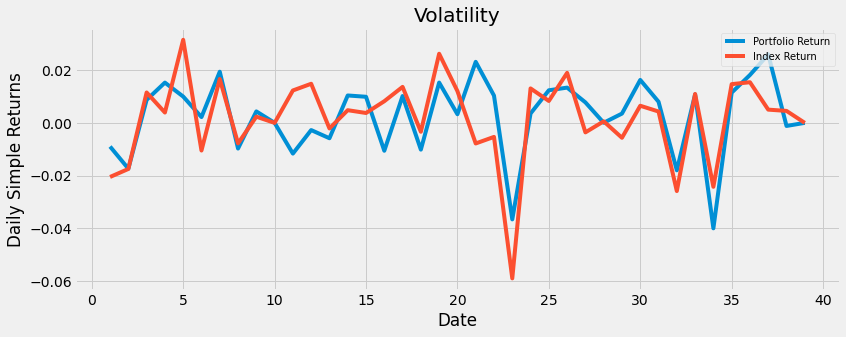

In [ ]:
plot_size = plt.figure(figsize=(12.2, 4.5))

plot_size

plt.plot(stocktrak['Portfolio Return'], label='Portfolio Return')
plt.plot(stocktrak['Index Return'],label='Index Return')

plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show

Visualized using yFinance (Yahoo Finance queried data)

<function matplotlib.pyplot.show>

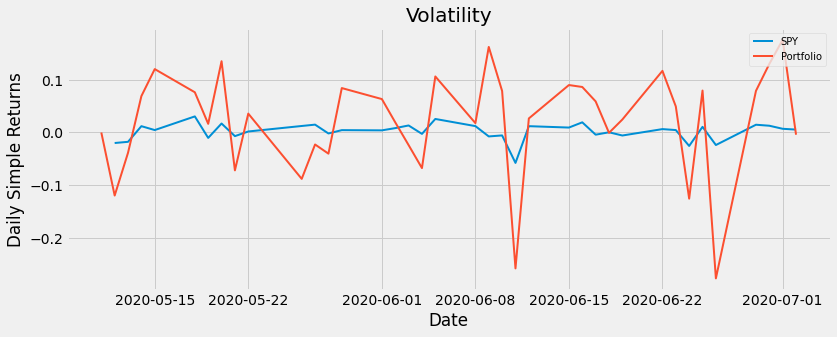

In [ ]:
plot_size = plt.figure(figsize=(12.2, 4.5))

plot_size
for c in dsr.columns.values:
  plt.plot(dsr[c], lw=2, label=c)

plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.xlabel('Date')
plt.ylabel('Daily Simple Returns')
plt.show

Visualize Cumulative Returns 

1) StockTrak Data

2) Yahoo Finance Queried Data

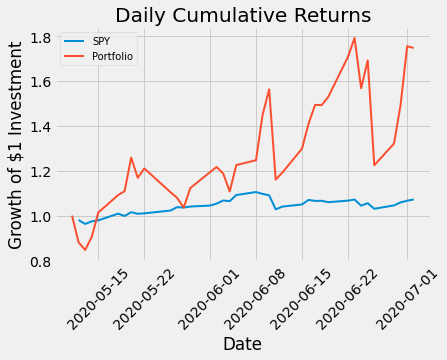

In [ ]:
daily_cm_returns = (dsr+1).cumprod()
#Visualize Cm Returns 
plot_size
for c in daily_cm_returns.columns.values:
  plt.plot(daily_cm_returns.index,daily_cm_returns[c],lw=2,label=2)
  plt.legend(dsr.columns.values, loc='upper left',fontsize=10)
  plt.xlabel('Date')
  plt.xticks(rotation=45)
  plt.ylabel('Growth of $1 Investment')
  plt.title('Daily Cumulative Returns')
plt.show()

In [ ]:
s_df = stocktrak[['Date','Index Return','Portfolio Return']]
s_df.set_index('Date',inplace=True)
s_df.head()

,Index Return,Portfolio Return
Date,,
2020-05-12,-0.020500,-0.008970
2020-05-13,-0.017463,-0.017354
2020-05-14,0.011525,0.008727
2020-05-15,0.003926,0.015268
2020-05-18,0.031501,0.009982


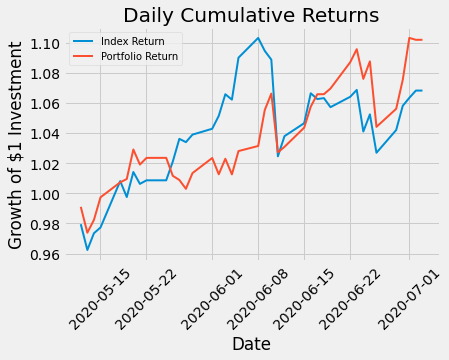

,Index Return,Portfolio Return
Date,,
2020-05-12,0.979500,0.991030
2020-05-13,0.962395,0.973832
2020-05-14,0.973486,0.982330
2020-05-15,0.977309,0.997328
2020-05-18,1.008095,1.007284


In [ ]:

stocktrak_cm = (s_df+1).cumprod()
plot_size

plt.plot(stocktrak_cm.index,stocktrak_cm['Index Return'],lw=2,label=2)
plt.plot(stocktrak_cm.index, stocktrak_cm['Portfolio Return'], lw=2,label=2)
plt.legend(stocktrak_cm.columns.values, loc='upper left',fontsize=10)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Growth of $1 Investment')
plt.title('Daily Cumulative Returns')
plt.show()

stocktrak_cm.head()

In [ ]:
dsr.head()


,SPY,Portfolio
Date,,
2020-05-11,NaN,0.000000
2020-05-12,-0.019932,-0.119451
2020-05-13,-0.017686,-0.038362
2020-05-14,0.011967,0.068954
2020-05-15,0.004597,0.120117


In [ ]:
dsr_corr = dsr.corr()


Correlation with SPY ETF

In [ ]:
annual_corr= dsr_corr*252
print("Annual Correlation: ", annual_corr)

Annual Correlation:                    SPY   Portfolio
SPY        252.000000  174.879582
Portfolio  174.879582  252.000000


In [ ]:
stocktrak_corr = s_df.corr()
#print('Correlation: ',s_df_corr)

stocktrak_mean = s_df.mean()
print("Mean:", stocktrak_mean)

s_df_var = s_df.var()
print('Variance: ','/n',s_df_var)

s_df_std = s_df.std()
print('Volatility: ',"/n", s_df_std)

Mean: Index Return        0.001821
Portfolio Return    0.002593
dtype: float64
Variance:  /n Index Return        0.000259
Portfolio Return    0.000207
dtype: float64
Volatility:  /n Index Return        0.016094
Portfolio Return    0.014390
dtype: float64
